### This notebook explores hourly Phycocyanin concentration

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(rc={'figure.figsize':(12,10.27)})

In [5]:
df_17 = pd.read_csv('../../data/2017_JP_TS.csv', parse_dates=['DateTime'], index_col='DateTime')

In [6]:
df_18 = pd.read_csv('../../data/2018_JP_TS_Level4.csv', parse_dates=['DateTime'], index_col='DateTime')

In [7]:
df_19 = pd.read_csv('../../data/2019_JP_TS_Level4.csv', parse_dates=['DateTime'], index_col='DateTime')

In [8]:
df_20 = pd.read_csv('../../data/2020_JP_TS_Level4.csv', parse_dates=['DateTime'], index_col='DateTime')

In [9]:
df = pd.concat([df_17, df_18, df_19, df_20], axis=0)

In [10]:
df.rename(columns={'PC_Water_EXO':'pc'}, inplace=True)

In [11]:
df.query('DateTime<2020 & pc')

,CalibrationChange_System_EXO,fDOM-TC_Water_EXO,FlowCell_System_EXO,pH_Water_EXO,SpCond_Water_EXO,Stage_Water_WaterLog,Temperature_Water_EXO,Temperature_Water_WaterLog,Turbidity_Water_EXO,Sitename,...,Stage_Water_IQ,Site_Name,Chloride_Water_EXO,Conductivity_Soil_HydraProbe,fDOM_Water_EXO,Conductivity-46cm_Soil_HydraProbe,Moisture-46cm_Soil_HydraProbe,Temperature-46cm_Soil_HydraProbe,Temperature_Water_IQ,pc
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-03-20 15:00:00,NaN,NaN,NaN,7.620,140.050,NaN,3.170,NaN,1.040,NaN,...,NaN,TS_Outlet,NaN,0.001,NaN,NaN,NaN,NaN,NaN,0.512
2019-03-20 16:00:00,NaN,NaN,NaN,7.623,138.782,NaN,3.460,NaN,0.995,NaN,...,NaN,TS_Outlet,18.225,0.001,1.413,NaN,NaN,NaN,NaN,0.494
2019-03-20 17:00:00,NaN,NaN,NaN,7.652,138.197,NaN,3.968,NaN,1.005,NaN,...,NaN,TS_Outlet,18.120,0.001,1.365,NaN,NaN,NaN,NaN,0.477
2019-03-20 18:00:00,NaN,NaN,NaN,7.675,139.070,NaN,4.400,NaN,0.985,NaN,...,NaN,TS_Outlet,17.810,0.001,1.420,NaN,NaN,NaN,NaN,0.470
2019-03-20 19:00:00,NaN,NaN,NaN,7.693,152.452,NaN,4.702,NaN,1.070,NaN,...,NaN,TS_Outlet,17.570,0.001,1.551,NaN,NaN,NaN,NaN,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,7.785,144.408,NaN,2.985,NaN,1.760,NaN,...,NaN,TS_Outlet,16.973,NaN,2.344,NaN,NaN,NaN,NaN,0.496
2019-12-31 20:00:00,NaN,NaN,NaN,7.793,144.839,NaN,3.014,NaN,1.700,NaN,...,NaN,TS_Outlet,16.831,NaN,2.349,NaN,NaN,NaN,NaN,0.502
2019-12-31 21:00:00,NaN,NaN,NaN,7.796,145.024,NaN,3.020,NaN,1.730,NaN,...,NaN,TS_Outlet,16.780,NaN,2.339,NaN,NaN,NaN,NaN,0.507


In [12]:
filtered_df = df[~df['pc'].isna()]

In [13]:
cols_to_drop = list(filter(lambda x:x not in ('pc', 'DateTime'), df.columns))

In [14]:
filtered_df.drop(columns=cols_to_drop, inplace=True)

/home/achara/achara_env/lib64/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
filtered_df.head()

,pc
DateTime,
2019-03-20 15:00:00,0.512
2019-03-20 16:00:00,0.494
2019-03-20 17:00:00,0.477
2019-03-20 18:00:00,0.470
2019-03-20 19:00:00,0.462


In [16]:
filtered_df['step'] = np.arange(len(filtered_df))

/home/achara/achara_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
filtered_df.head()

,pc,step
DateTime,,
2019-03-20 15:00:00,0.512,0
2019-03-20 16:00:00,0.494,1
2019-03-20 17:00:00,0.477,2
2019-03-20 18:00:00,0.470,3
2019-03-20 19:00:00,0.462,4


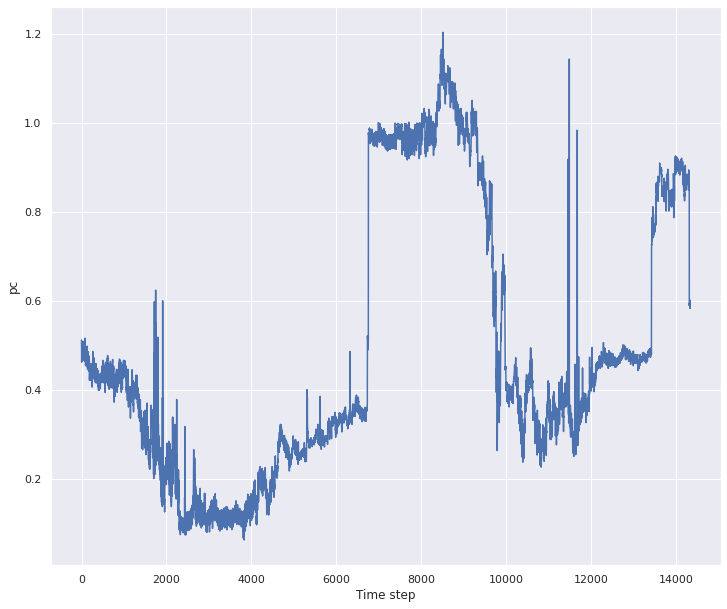

In [18]:
sns.lineplot(x='step', y='pc', data=filtered_df)
plt.xlabel('Time step')
plt.show()

In [19]:
filtered_df['avg'] = filtered_df.loc[:,'pc'].rolling(1000).mean()

/home/achara/achara_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


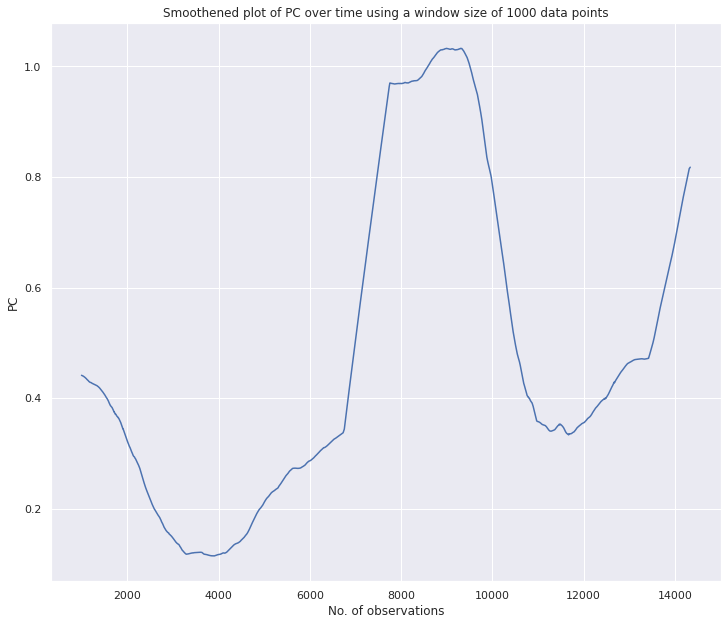

In [20]:
sns.lineplot(x='step', y='avg', data=filtered_df)
plt.title('Smoothened plot of PC over time using a window size of 1000 data points')
plt.xlabel('No. of observations')
plt.ylabel('PC')
plt.show()

In [21]:
filtered_df['lag_11'] = filtered_df['pc'].shift(11)

/home/achara/achara_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


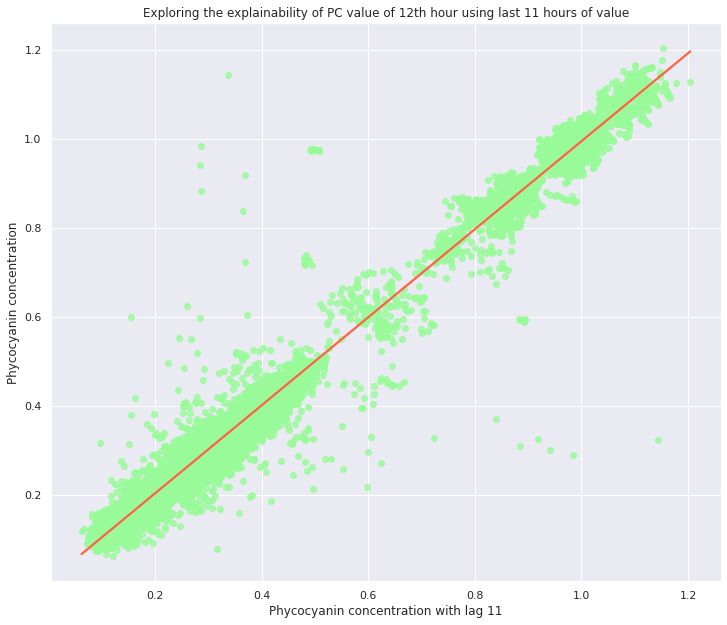

In [22]:
sns.regplot(x='lag_11', y='pc', data=filtered_df, scatter_kws={"color":"palegreen"}, line_kws={"color":"tomato"})
plt.title('Exploring the explainability of PC value of 12th hour using last 11 hours of value')
plt.xlabel('Phycocyanin concentration with lag 11')
plt.ylabel('Phycocyanin concentration')
plt.show()

/home/achara/achara_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


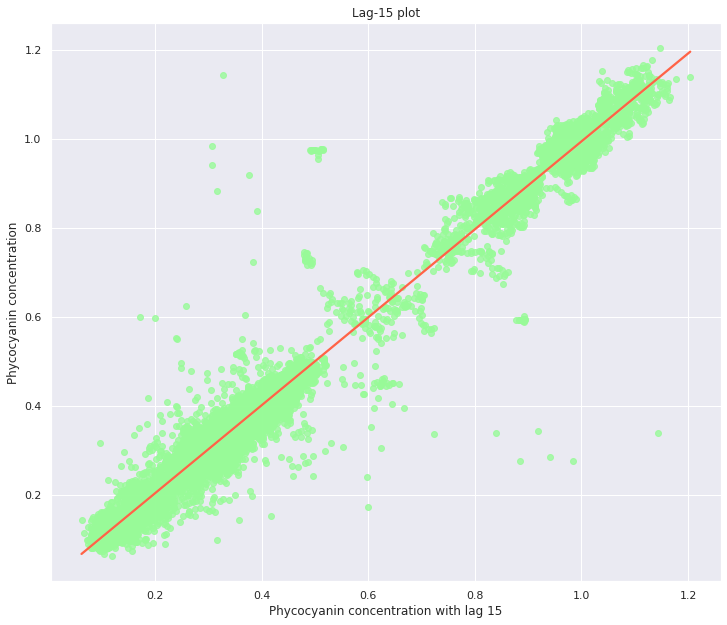

In [23]:

filtered_df['lag_15'] = filtered_df['pc'].shift(15)
sns.regplot(x='lag_15', y='pc', data=filtered_df, scatter_kws={"color":"palegreen"}, line_kws={"color":"tomato"})
plt.title('Lag-15 plot')
plt.xlabel('Phycocyanin concentration with lag 15')
plt.ylabel('Phycocyanin concentration')
plt.show()

/home/achara/achara_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


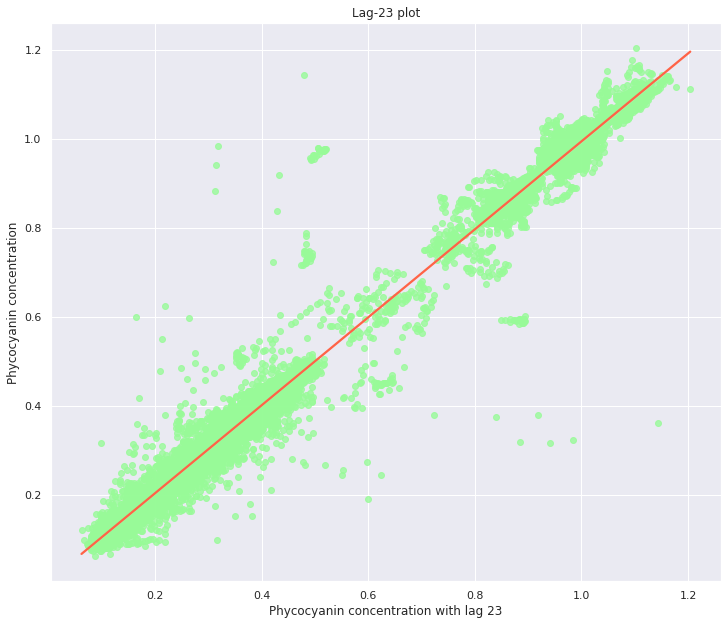

In [24]:

filtered_df['lag_23'] = filtered_df['pc'].shift(23)
sns.regplot(x='lag_23', y='pc', data=filtered_df, scatter_kws={"color":"palegreen"}, line_kws={"color":"tomato"})
plt.title('Lag-23 plot')
plt.xlabel('Phycocyanin concentration with lag 23')
plt.ylabel('Phycocyanin concentration')
plt.show()

In [25]:
filtered_df.columns

Index(['pc', 'step', 'avg', 'lag_11', 'lag_15', 'lag_23'], dtype='object')

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regr = LinearRegression()

In [28]:
idx =~filtered_df['lag_11'].isna()

In [29]:
regr.fit(filtered_df.loc[idx.values,['lag_11']], filtered_df.loc[idx.values, ['pc']])

LinearRegression()

In [30]:
pc_pred_11 = regr.predict(filtered_df.loc[idx.values,['lag_11']]) 

In [31]:
data = {
    'actual': filtered_df.loc[idx.values, 'pc'].tolist(),
    'pred': np.round(pc_pred_11.ravel(), 3)
}
pred_df = pd.DataFrame(data)

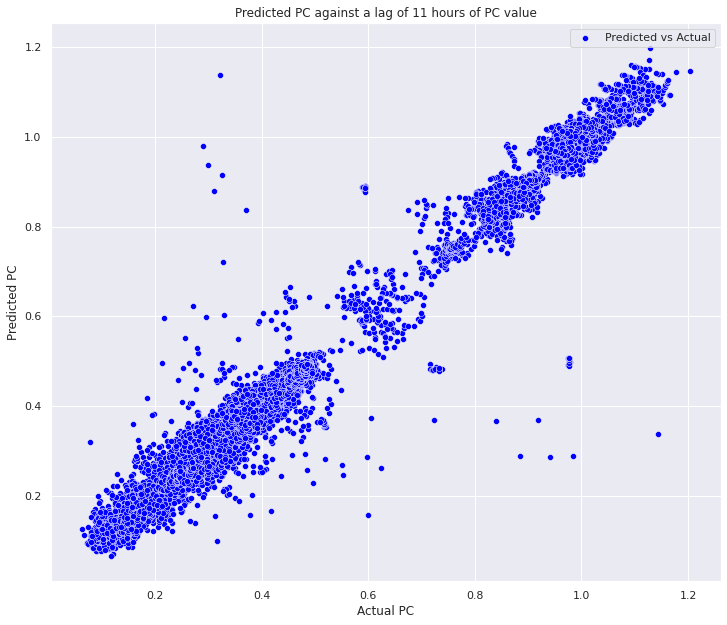

In [32]:
sns.scatterplot(x='actual', y='pred', data=pred_df, color='blue', marker='o', label='Predicted vs Actual')
plt.title('Predicted PC against a lag of 11 hours of PC value')
plt.xlabel('Actual PC')
plt.ylabel('Predicted PC')
plt.show()

In [33]:
residuals = pred_df['actual']-pred_df['pred']

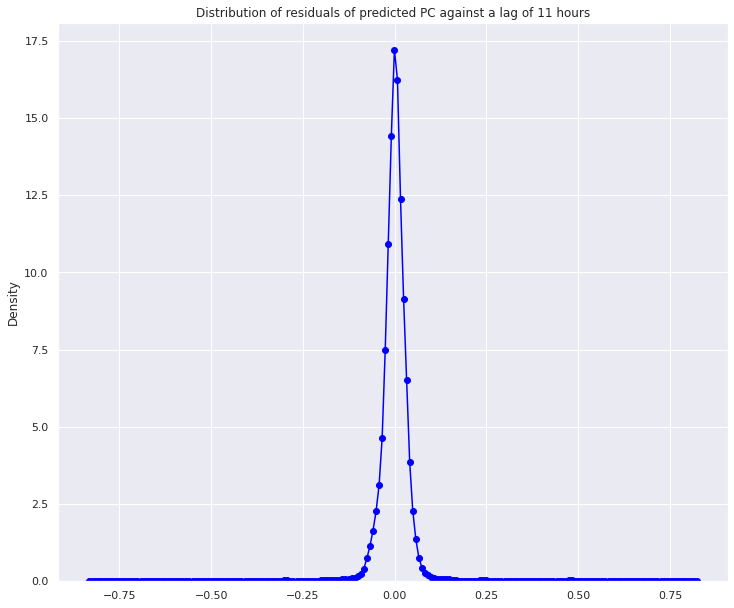

In [34]:
sns.kdeplot(x=residuals, color='blue', marker='o')
plt.title('Distribution of residuals of predicted PC against a lag of 11 hours')
plt.show()

In [35]:
## Predict PC using a lag of 15 hours

idx = ~filtered_df['lag_15'].isna()
x = filtered_df.loc[idx.values, ['lag_15']]
y = filtered_df.loc[idx.values, ['pc']]

regr.fit(x,y)

y_pred = regr.predict(x)

In [36]:
data = {
    'actual': y.values.ravel(),
    'pred': np.round(y_pred.ravel(), 3)
}
pred_df = pd.DataFrame(data)

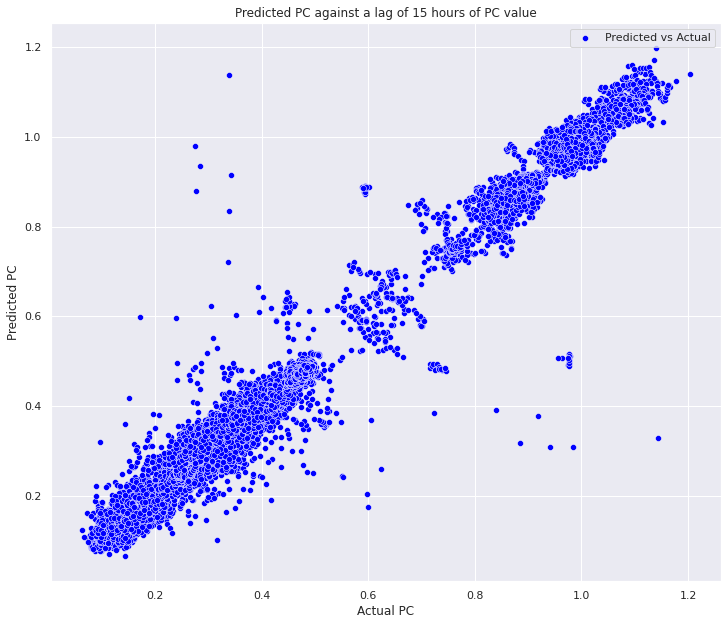

In [37]:
sns.scatterplot(x='actual', y='pred', data=pred_df, color='blue', marker='o', label='Predicted vs Actual')
plt.title('Predicted PC against a lag of 15 hours of PC value')
plt.xlabel('Actual PC')
plt.ylabel('Predicted PC')
plt.show()

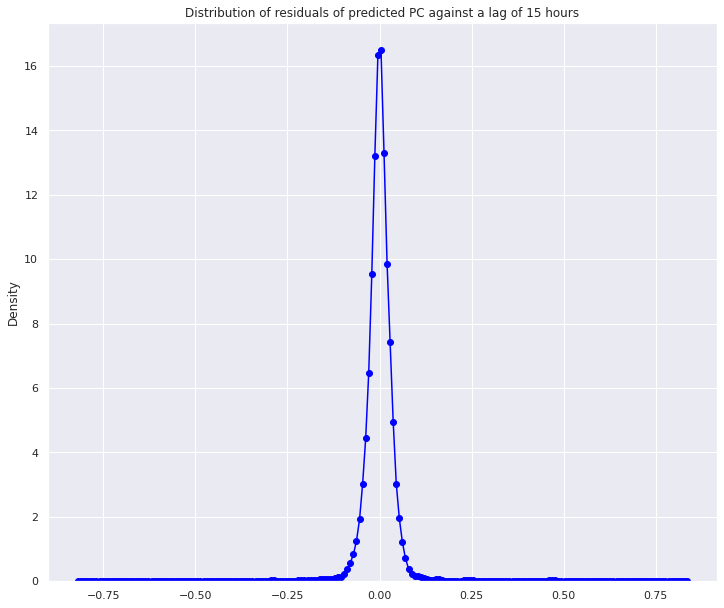

In [38]:
residuals = pred_df['actual']-pred_df['pred']
sns.kdeplot(residuals, color='blue', marker='o')
plt.title('Distribution of residuals of predicted PC against a lag of 15 hours')
plt.show()

In [39]:
## Predict PC using a lag of 23 hours

idx = ~filtered_df['lag_23'].isna()
x = filtered_df.loc[idx.values, ['lag_23']]
y = filtered_df.loc[idx.values, ['pc']]

regr.fit(x,y)

y_pred = regr.predict(x)

data = {
    'actual': y.values.ravel(),
    'pred': np.round(y_pred.ravel(), 3)
}
pred_df = pd.DataFrame(data)

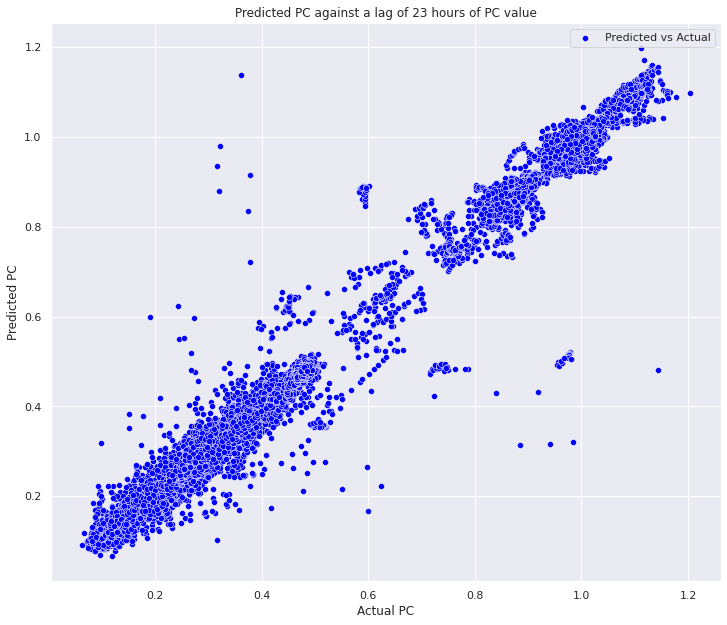

In [40]:
sns.scatterplot(x='actual', y='pred', data=pred_df, color='blue', marker='o', label='Predicted vs Actual')
plt.title('Predicted PC against a lag of 23 hours of PC value')
plt.xlabel('Actual PC')
plt.ylabel('Predicted PC')
plt.show()

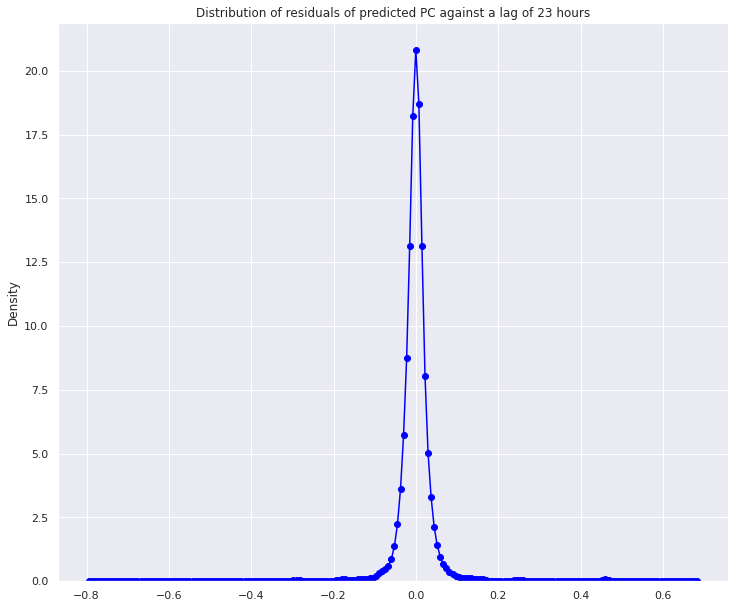

In [41]:
residuals = pred_df['actual']-pred_df['pred']
sns.kdeplot(residuals, color='blue', marker='o')
plt.title('Distribution of residuals of predicted PC against a lag of 23 hours')
plt.show()

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [43]:
df = filtered_df.loc[:,['pc']]

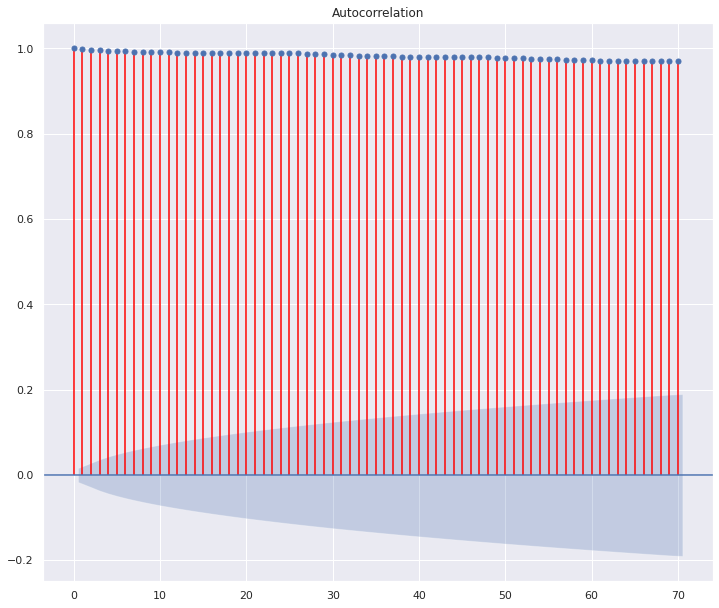

In [44]:
plot_acf(df.pc.tolist(), lags=70, vlines_kwargs={'color':'red'})
plt.show()

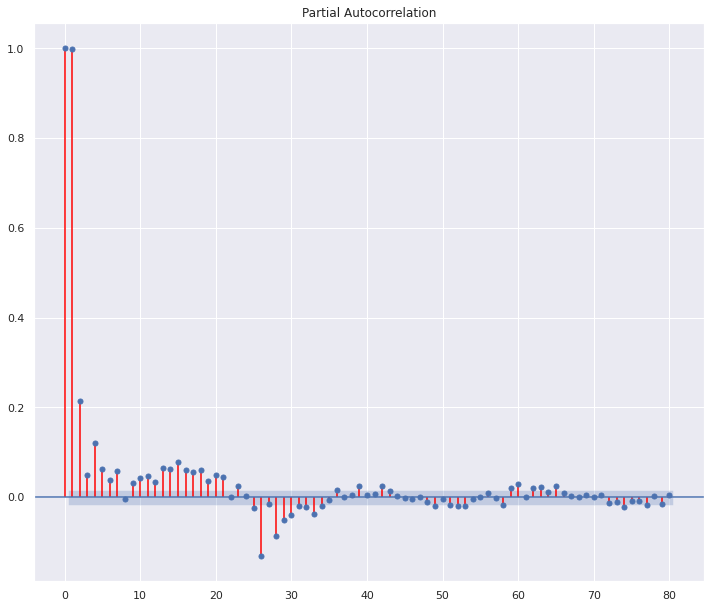

In [45]:
plot_pacf(df.pc.tolist(), lags=80, vlines_kwargs={'color':'red'})
plt.show()

### Test for stationarity of `pc` value

In [46]:
from statsmodels.tsa.stattools import adfuller, kpss

In [47]:
result = adfuller(df.pc.values, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.6091947971659513
p-value: 0.4789731890133136


Since `p-value` is higher than `5%` hence we cannot reject the null-hypothesis that the time series is non-stationary. Which means we need to convert it to stationary TS

In [48]:
df['lag'] = df.pc.shift(1)

In [49]:
df.head()

,pc,lag
DateTime,,
2019-03-20 15:00:00,0.512,NaN
2019-03-20 16:00:00,0.494,0.512
2019-03-20 17:00:00,0.477,0.494
2019-03-20 18:00:00,0.470,0.477
2019-03-20 19:00:00,0.462,0.470


In [50]:
df[~df.lag.isna()]

,pc,lag
DateTime,,
2019-03-20 16:00:00,0.494,0.512
2019-03-20 17:00:00,0.477,0.494
2019-03-20 18:00:00,0.470,0.477
2019-03-20 19:00:00,0.462,0.470
2019-03-20 20:00:00,0.477,0.462
...,...,...
2020-12-31 19:00:00,0.586,0.583
2020-12-31 20:00:00,0.589,0.586
2020-12-31 21:00:00,0.595,0.589


In [51]:
def difference(df:pd.DataFrame):
    n=len(df)
    result = None
    k=1
    for i in range(1,n):
        df['lag'] = df.pc.shift(i)
        df = df[~df.lag.isna()]
        df.diff = df.pc - df.lag
        result = adfuller(df.diff.values)
        if result[1]<=0.5:
            break
        k+=1
    return (k, result, df)

In [52]:
diff_cnt , res,output = difference(df.copy())

In [53]:
diff_cnt

1

In [54]:
output.head()

,pc,lag
DateTime,,
2019-03-20 16:00:00,0.494,0.512
2019-03-20 17:00:00,0.477,0.494
2019-03-20 18:00:00,0.470,0.477
2019-03-20 19:00:00,0.462,0.470
2019-03-20 20:00:00,0.477,0.462


In [55]:
diff_df = output.copy()

In [56]:
diff_df['diff'] = diff_df.pc-diff_df.lag

In [57]:
diff_df.head()

,pc,lag,diff
DateTime,,,
2019-03-20 16:00:00,0.494,0.512,-0.018
2019-03-20 17:00:00,0.477,0.494,-0.017
2019-03-20 18:00:00,0.470,0.477,-0.007
2019-03-20 19:00:00,0.462,0.470,-0.008
2019-03-20 20:00:00,0.477,0.462,0.015


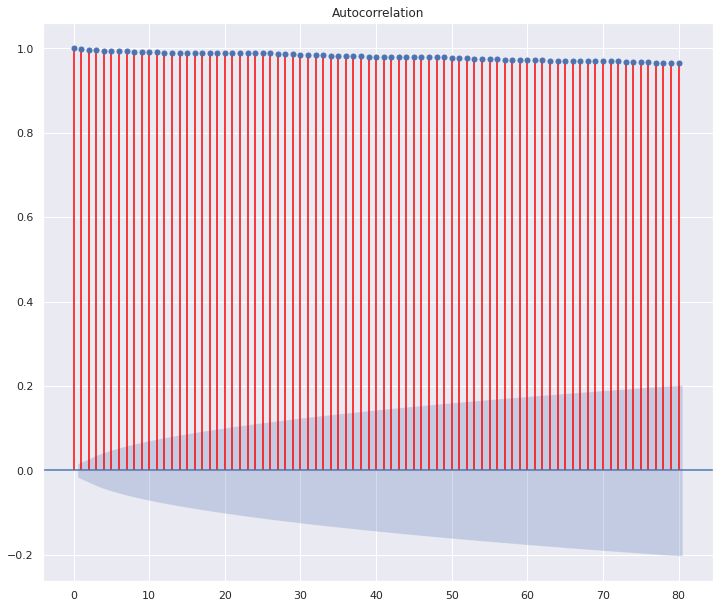

In [58]:
plot_acf(df.pc.tolist(), lags=80, vlines_kwargs={'color':'red'})
plt.show()

### Splitting into train and test sets and predicting

In [59]:
diff_df['step'] = np.arange(len(diff_df))

In [60]:
diff_df.head()

,pc,lag,diff,step
DateTime,,,,
2019-03-20 16:00:00,0.494,0.512,-0.018,0
2019-03-20 17:00:00,0.477,0.494,-0.017,1
2019-03-20 18:00:00,0.470,0.477,-0.007,2
2019-03-20 19:00:00,0.462,0.470,-0.008,3
2019-03-20 20:00:00,0.477,0.462,0.015,4


In [61]:
train_frac = 0.8
train_n = round(train_frac*len(diff_df))
test_n = len(diff_df) - train_n

train_df = diff_df.iloc[:train_n, :]
test_df = diff_df.iloc[train_n:,:]

In [62]:
# splitting the dataset:

X_train = train_df.loc[:,['step']]
y_train = train_df.loc[:,['diff']]

X_test = test_df.loc[:, ['step']]
y_test = test_df.loc[:, ['diff']]

In [63]:
regr.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = regr.predict(X_test)

In [65]:
residuals = y_pred - y_test

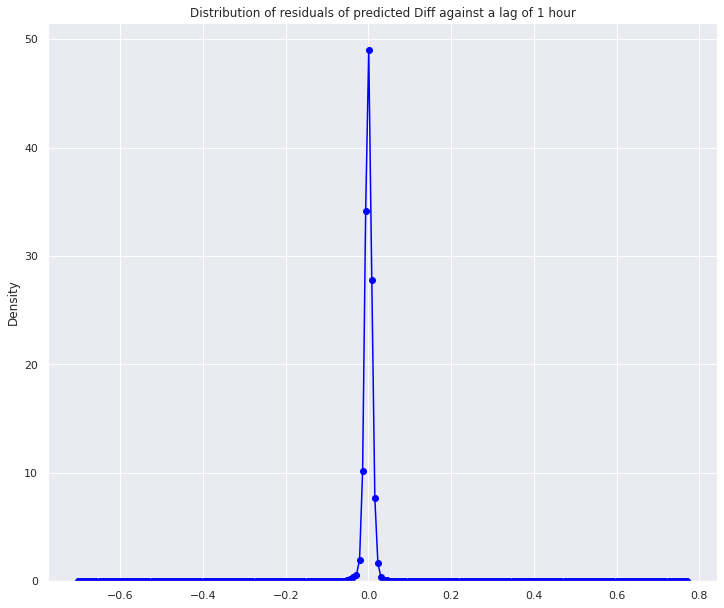

In [66]:
sns.kdeplot(np.reshape(residuals.values, (-1)), color='blue', marker='o')
plt.title('Distribution of residuals of predicted Diff against a lag of 1 hour')
plt.show()

In [67]:
test_df.head()

,pc,lag,diff,step
DateTime,,,,
2020-08-06 17:00:00,0.344,0.357,-0.013,11467
2020-08-06 18:00:00,0.375,0.344,0.031,11468
2020-08-06 19:00:00,0.371,0.375,-0.004,11469
2020-08-06 20:00:00,0.327,0.371,-0.044,11470
2020-08-06 21:00:00,0.325,0.327,-0.002,11471


In [70]:
pc_pred['pc'] = test_df.loc[:,['lag']]+y_pred

In [76]:
residuals = pc_pred.loc[:,['pc']]-test_df.loc[:,['pc']]

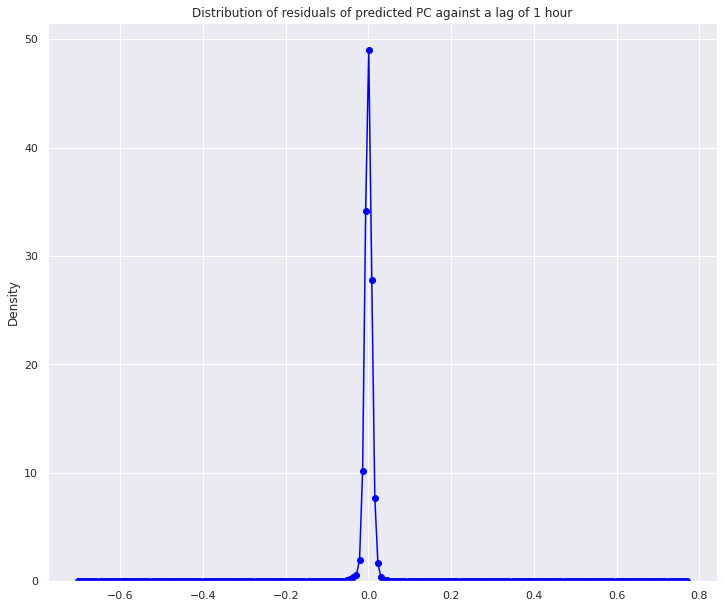

In [77]:
sns.kdeplot(np.reshape(residuals.values, (-1)), color='blue', marker='o')
plt.title('Distribution of residuals of predicted PC against a lag of 1 hour')
plt.show()

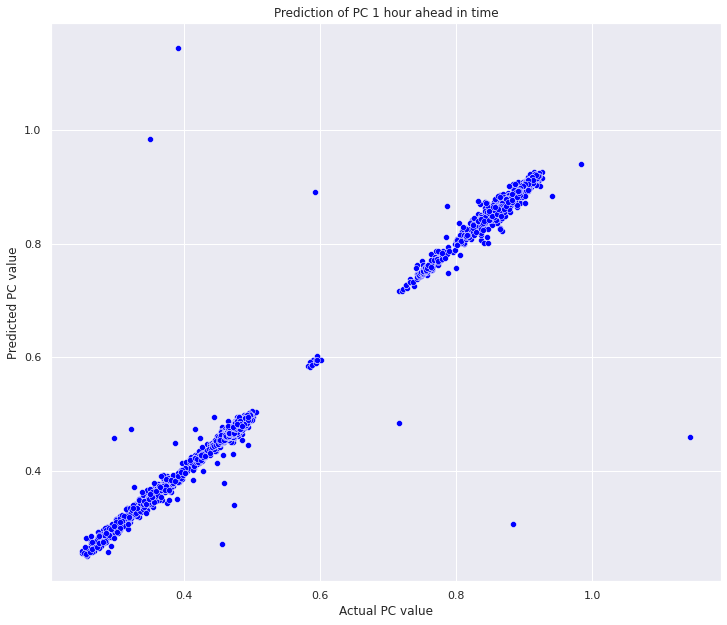

In [83]:
sns.scatterplot(x=test_df['pc'], y=pc_pred['pc'], color='blue', marker='o')
plt.title('Prediction of PC 1 hour ahead in time')
plt.xlabel('Actual PC value')
plt.ylabel('Predicted PC value')
plt.show()